In [89]:
base_path = ('D:/COS40007/Portfolio 3')

In [90]:
import pandas as pd
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings


In [91]:

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.7f}'.format

In [92]:
raw_df = pd.read_csv(base_path + '/vegemite.csv')
df = raw_df.copy()

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15237 entries, 0 to 15236
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        15237 non-null  float64
 1   FFTE Production solids SP      15237 non-null  float64
 2   FFTE Steam pressure SP         15237 non-null  float64
 3   TFE Out flow SP                15237 non-null  float64
 4   TFE Production solids SP       15237 non-null  float64
 5   TFE Vacuum pressure SP         15237 non-null  float64
 6   TFE Steam pressure SP          15237 non-null  float64
 7   TFE Steam temperature SP       15237 non-null  float64
 8   FFTE Feed flow SP              15237 non-null  float64
 9   FFTE Out steam temp SP         15237 non-null  float64
 10  Extract tank Level             15237 non-null  float64
 11  Extract tank Out flow PV       15237 non-null  float64
 12  FFTE Discharge density         15237 non-null 

(15237, 47)

In [93]:
shuffled_df = df.sample(n=len(df)).reset_index(drop=True)
shuffled_df.to_csv(base_path + '/shuffled_vegemite.csv', index=False)
shuffled_df.shape

(15237, 47)

In [94]:
data = pd.read_csv(base_path + '/shuffled_vegemite.csv')
display(data.isnull().sum())
     

FFTE Feed tank level SP          0
FFTE Production solids SP        0
FFTE Steam pressure SP           0
TFE Out flow SP                  0
TFE Production solids SP         0
TFE Vacuum pressure SP           0
TFE Steam pressure SP            0
TFE Steam temperature SP         0
FFTE Feed flow SP                0
FFTE Out steam temp SP           0
Extract tank Level               0
Extract tank Out flow PV         0
FFTE Discharge density           0
FFTE Discharge solids            0
FFTE Feed flow rate PV           0
FFTE Feed tank level PV          0
FFTE Heat temperature 1          0
FFTE Heat temperature 2          0
FFTE Heat temperature 3          0
FFTE Out steam temp PV           0
FFTE Production solids PV        0
FFTE Pump 1                      0
FFTE Pump 1 - 2                  0
FFTE Pump 2                      0
FFTE Steam pressure PV           0
FFTE Temperature 1 - 1           0
FFTE Temperature 1 - 2           0
FFTE Temperature 2 - 1           0
FFTE Temperature 2 -

In [95]:
print("Rows before delete duplicated data", data.shape[0])

data_cleaned = data.drop_duplicates()

print("Rows after delete duplicated data", data_cleaned.shape[0])

display(data_cleaned.head())

data_cleaned.to_csv(base_path + '/cleaned_shuffled_vegemite.csv')

Rows before delete duplicated data 15237
Rows after delete duplicated data 15237


,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,TFE Steam temperature SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,Extract tank Out flow PV,FFTE Discharge density,FFTE Discharge solids,FFTE Feed flow rate PV,FFTE Feed tank level PV,FFTE Heat temperature 1,FFTE Heat temperature 2,FFTE Heat temperature 3,FFTE Out steam temp PV,FFTE Production solids PV,FFTE Pump 1,FFTE Pump 1 - 2,FFTE Pump 2,FFTE Steam pressure PV,FFTE Temperature 1 - 1,FFTE Temperature 1 - 2,FFTE Temperature 2 - 1,FFTE Temperature 2 - 2,FFTE Temperature 3 - 1,FFTE Temperature 3 - 2,FFTE Unk Temperature,TFE Feed pump,TFE Input flow PV,TFE Level,TFE Motor current,TFE Motor speed,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
0,50.0000000,43.0000000,105.0000000,2846.5100000,70.0000000,-43.9300000,120.0000000,80.0000000,10200.0000000,50.0000000,38.4500000,5.4000000,1.5300000,45.0700000,9382.6200000,49.2200000,64.1500000,66.5200000,67.2300000,50.1500000,44.7800000,80.0000000,100.0000000,81.0000000,112.9400000,81.7100000,82.7000000,63.8300000,58.8300000,21.6100000,82.7000000,67.6400000,20.0000000,1808.6900000,44.4100000,29.1400000,80.0000000,1474.7100000,0.0000000,68.2500000,0.7600000,119.9100000,72.2300000,84.1700000,72.0000000,-73.8600000,0
1,50.0000000,42.0000000,115.0000000,1992.8600000,69.0000000,-49.1600000,120.0000000,80.0000000,9500.0000000,50.0000000,64.9600000,18.0800000,1.2600000,44.1100000,9286.6400000,49.0600000,60.8800000,63.0600000,61.2700000,49.8600000,46.6400000,80.0000000,100.0000000,81.0000000,124.9600000,81.8700000,83.5700000,66.3000000,60.4300000,18.4300000,82.8300000,63.2500000,23.9300000,1763.9400000,51.9100000,40.7800000,80.0000000,846.9500000,0.0000000,67.8100000,1.2400000,119.9100000,69.7300000,33.1800000,70.0000000,-79.4900000,0
2,50.0000000,43.0000000,119.8800000,2917.6700000,73.0000000,-80.0000000,120.0000000,80.0000000,10600.0000000,50.0000000,48.1000000,17.7000000,1.1800000,44.5500000,9293.1300000,50.8200000,55.1800000,62.8000000,61.4600000,50.0200000,45.2300000,80.0000000,100.0000000,81.0000000,125.3100000,81.4900000,82.9300000,65.3700000,60.2400000,17.7600000,82.4500000,66.4300000,24.0000000,1846.9500000,45.2800000,28.6400000,80.0000000,1859.9200000,0.0000000,65.4200000,1.0600000,119.5800000,70.8900000,62.8600000,71.0000000,-74.9300000,1
3,50.0000000,43.0000000,115.0000000,2846.5100000,70.0000000,-36.3700000,120.0000000,80.0000000,10200.0000000,50.0000000,54.4100000,4.2400000,1.1000000,35.0900000,10516.8600000,49.3200000,52.2300000,67.6100000,67.1600000,49.9900000,35.6300000,80.0000000,100.0000000,81.0000000,119.2900000,68.1900000,70.8500000,60.7800000,54.6000000,15.6400000,68.6000000,69.0500000,12.4500000,1923.4800000,44.4500000,26.7800000,80.0000000,1461.7400000,0.0000000,45.4000000,0.9400000,119.9100000,69.9300000,48.3800000,69.0000000,-77.0300000,2
4,50.0000000,41.5000000,115.0000000,2174.4600000,71.0000000,-73.5100000,120.0000000,80.0000000,9400.0000000,50.1200000,54.0100000,17.5100000,1.2500000,49.5600000,9293.1300000,50.6000000,61.4900000,67.6100000,64.7900000,50.0900000,48.2100000,80.0000000,100.0000000,81.0000000,118.5700000,85.5900000,86.7700000,69.7300000,64.1200000,17.5600000,86.5200000,67.0300000,27.0000000,1840.4700000,46.1100000,33.6100000,80.0000000,1706.2300000,0.0000000,68.9800000,1.2000000,119.9100000,76.2700000,83.2000000,76.0000000,-69.6500000,0


Create balance test set

In [96]:


grouped = data_cleaned.groupby('Class')

test_samples = []

test_samples.append(grouped.get_group(0).sample(n=333, random_state=1))
test_samples.append(grouped.get_group(1).sample(n=333, random_state=1))
test_samples.append(grouped.get_group(2).sample(n=334, random_state=1))
test_df = pd.concat(test_samples)

train_df = shuffled_df.drop(test_df.index)


     

In [97]:
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print("\nTest set class distribution:\n", test_df['Class'].value_counts())


Training set shape: (14237, 47)
Test set shape: (1000, 47)

Test set class distribution:
 Class
2    334
0    333
1    333
Name: count, dtype: int64


In [98]:
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']



In [99]:
train_df.to_csv(base_path + '/train_df_vegemite.csv', index=False)
test_df.to_csv(base_path + '/test_df_vegemite.csv', index=False)

Remove columns with constants

In [100]:
raw_train_df = pd.read_csv(base_path + '/train_df_vegemite.csv')
train_df = raw_train_df.copy()


In [101]:
columns_to_drop = [c for c in train_df.columns if train_df[c].nunique() == 1]
train_df = train_df.drop(columns=columns_to_drop)

print(f"Removed columns {columns_to_drop} since they have only one unique value in train_df")


Removed columns ['TFE Steam temperature SP', 'TFE Product out temperature'] since they have only one unique value in train_df


Convert columns with few unique values to categorical


In [102]:
MAX_VALUES_TO_CONVERT = 5
columns_to_convert = [c for c in train_df.columns if c != 'Class' and train_df[c].nunique() <= MAX_VALUES_TO_CONVERT]
print(f"Columns found to convert: {columns_to_convert}")

Columns found to convert: ['FFTE Feed tank level SP', 'FFTE Pump 1', 'FFTE Pump 1 - 2', 'FFTE Pump 2', 'TFE Motor speed']


In [103]:

label_encoders = {}

for c in columns_to_convert:
  encoder = LabelEncoder()
  train_df[c] = encoder.fit_transform(train_df[c])
  label_encoders[c] = encoder

print("Label encoders for each columns: ", label_encoders)
train_df.to_csv("converted_vegemite.csv", index=False)

Label encoders for each columns:  {'FFTE Feed tank level SP': LabelEncoder(), 'FFTE Pump 1': LabelEncoder(), 'FFTE Pump 1 - 2': LabelEncoder(), 'FFTE Pump 2': LabelEncoder(), 'TFE Motor speed': LabelEncoder()}


Class distribution

Class
2    7214
1    4714
0    2309
Name: count, dtype: int64


<Axes: xlabel='Class'>

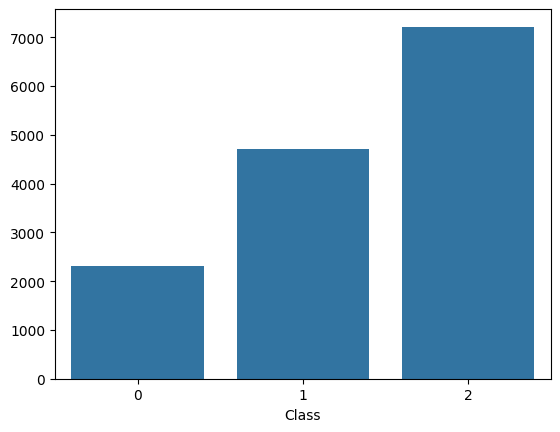

In [104]:
raw_converted_df = pd.read_csv(base_path + '/converted_vegemite.csv')
converted_df = raw_converted_df.copy()

distribution_of_class = converted_df['Class'].value_counts()
print(distribution_of_class)

sns.barplot(x=distribution_of_class.index, y=distribution_of_class.values)


In [105]:

X = converted_df.drop('Class', axis=1)
Y = converted_df['Class']

print(f"Class before re-distributed: ({Y.value_counts()})")
smote_resampler = SMOTE(random_state=42)
tomek_links_resampler = TomekLinks()

Class before re-distributed: (Class
2    7214
1    4714
0    2309
Name: count, dtype: int64)


In [106]:
X_smote, Y_smote = smote_resampler.fit_resample(X, Y)
X_balanced, Y_balanced = tomek_links_resampler.fit_resample(X_smote, Y_smote)

print(f"Class after re-distributed: ({Y_balanced.value_counts()})")
resampled_df = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.Series(Y_balanced, name='Class')], axis=1)

Class after re-distributed: (Class
0    7214
1    7116
2    7098
Name: count, dtype: int64)


Data normalisation 

In [107]:
resampled_df.to_csv(base_path + '/resampled_vegemite.csv', index=False)

In [108]:
raw_resampled_df = pd.read_csv(base_path + '/resampled_vegemite.csv')
resampled_df = raw_converted_df.copy()

resampled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFTE Feed tank level SP,14237.0000000,1.7323172,0.6809360,0.0000000,2.0000000,2.0000000,2.0000000,2.0000000
FFTE Production solids SP,14237.0000000,41.8391234,1.1424873,39.0000000,41.1100000,42.0000000,43.0000000,43.0000000
FFTE Steam pressure SP,14237.0000000,118.7864894,17.3763410,60.0000000,106.0000000,120.0000000,130.0000000,225.0000000
TFE Out flow SP,14237.0000000,2435.9373906,396.0745766,1687.1800000,2066.6700000,2296.3000000,2846.5100000,3012.5600000
TFE Production solids SP,14237.0000000,62.6194746,15.1748563,0.0000000,62.0000000,65.0000000,71.0000000,98.0000000
TFE Vacuum pressure SP,14237.0000000,-65.3250453,13.6246602,-80.0000000,-78.7000000,-68.6600000,-53.5100000,-36.3700000
TFE Steam pressure SP,14237.0000000,114.8245108,25.2026581,2.0000000,120.0000000,120.0000000,120.0000000,135.0000000
FFTE Feed flow SP,14237.0000000,10049.1739833,1413.5573219,8750.0000000,9400.0000000,9600.0000000,10200.0000000,18000.0000000
FFTE Out steam temp SP,14237.0000000,49.6636286,2.0557731,40.7100000,50.0000000,50.0000000,50.0000000,54.3800000
Extract tank Level,14237.0000000,46.9697071,19.0320850,0.6200000,37.3500000,52.1700000,61.8200000,75.6200000


In [109]:



features = resampled_df.drop('Class', axis=1)
target = resampled_df['Class']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


In [110]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Class'] = target.values
print(scaled_df.head())
scaled_df.to_csv(base_path + '/scaled_vegemite.csv', index=False)

   FFTE Feed tank level SP  FFTE Production solids SP  FFTE Steam pressure SP  \
0                1.0000000                  1.0000000               0.2727273   
1                1.0000000                  0.7500000               0.3333333   
2                1.0000000                  1.0000000               0.3629091   
3                1.0000000                  1.0000000               0.3333333   
4                1.0000000                  0.6250000               0.3333333   

   TFE Out flow SP  TFE Production solids SP  TFE Vacuum pressure SP  \
0        0.8747152                 0.7142857               0.8267247   
1        0.2306357                 0.7040816               0.7068531   
2        0.9284054                 0.7448980               0.0000000   
3        0.8747152                 0.7142857               1.0000000   
4        0.3676531                 0.7244898               0.1487509   

   TFE Steam pressure SP  FFTE Feed flow SP  FFTE Out steam temp SP  \
0        

Correlation analysis

In [111]:
raw_scaled_df = pd.read_csv(base_path +'/scaled_vegemite.csv')
scaled_df = raw_scaled_df.copy()
print(len([c for c in scaled_df.columns]))


45


In [112]:
features_df = scaled_df.drop('Class', axis=1)
corr_matrix = scaled_df.corr()
corr_abs = corr_matrix.abs()
high_corr_pairs = corr_abs.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs < 1) & (high_corr_pairs > 0.95)]
print("Top correlated pairs found:\n", high_corr_pairs.head(2))



Top correlated pairs found:
 FFTE Pump 1  FFTE Pump 2   0.9989101
FFTE Pump 2  FFTE Pump 1   0.9989101
dtype: float64


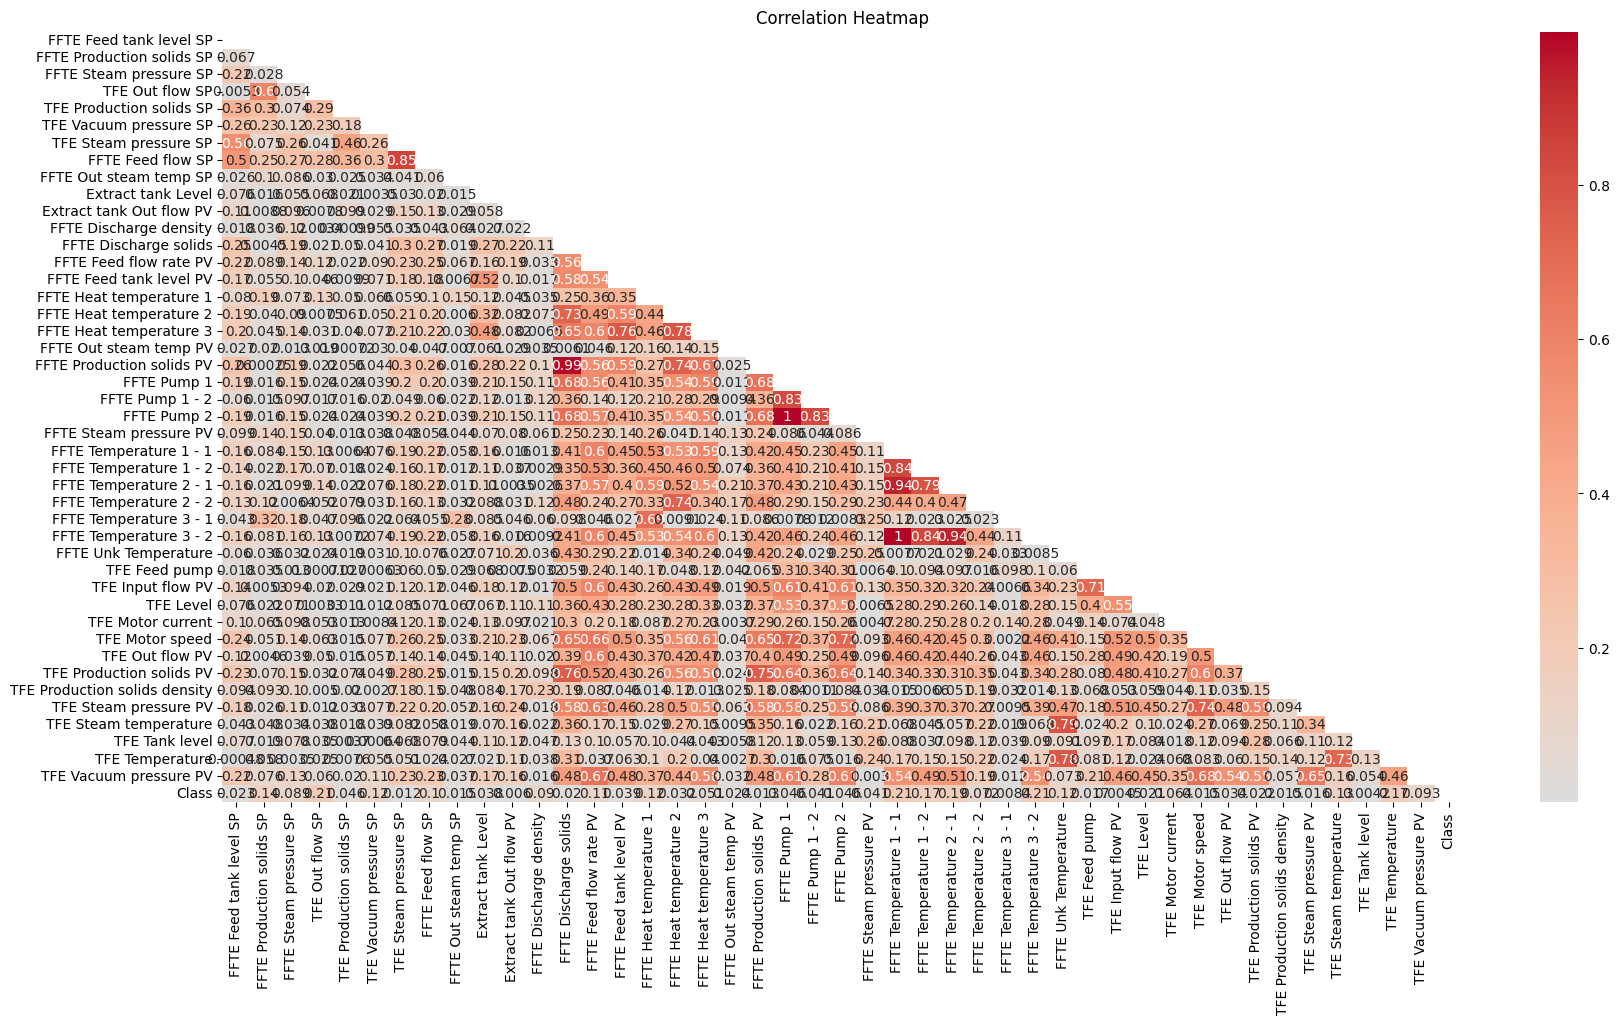

In [113]:
mask = np.triu(np.ones_like(corr_abs, dtype=bool))
plt.figure(figsize=(20, 10))
sns.heatmap(corr_abs, annot=True, mask=mask, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()
     

In [114]:
new_feature_name = 'FFTE_Pump_Average'
cols_to_combine = ['FFTE Pump 1', 'FFTE Pump 2']
scaled_df[new_feature_name] = scaled_df[cols_to_combine].mean(axis=1)
print(f"\nCreated new composite feature: '{new_feature_name}'")



Created new composite feature: 'FFTE_Pump_Average'


In [115]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14237 entries, 0 to 14236
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        14237 non-null  float64
 1   FFTE Production solids SP      14237 non-null  float64
 2   FFTE Steam pressure SP         14237 non-null  float64
 3   TFE Out flow SP                14237 non-null  float64
 4   TFE Production solids SP       14237 non-null  float64
 5   TFE Vacuum pressure SP         14237 non-null  float64
 6   TFE Steam pressure SP          14237 non-null  float64
 7   FFTE Feed flow SP              14237 non-null  float64
 8   FFTE Out steam temp SP         14237 non-null  float64
 9   Extract tank Level             14237 non-null  float64
 10  Extract tank Out flow PV       14237 non-null  float64
 11  FFTE Discharge density         14237 non-null  float64
 12  FFTE Discharge solids          14237 non-null 

In [116]:
scaled_df.to_csv(base_path + '/composited_vegemite.csv', index=False)
print(len([c for c in scaled_df.columns]))

46


Feature Engineering

In [117]:

raw_composited_df = pd.read_csv(base_path + '/composited_vegemite.csv')
composited_df = raw_composited_df.copy()

composited_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14237 entries, 0 to 14236
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        14237 non-null  float64
 1   FFTE Production solids SP      14237 non-null  float64
 2   FFTE Steam pressure SP         14237 non-null  float64
 3   TFE Out flow SP                14237 non-null  float64
 4   TFE Production solids SP       14237 non-null  float64
 5   TFE Vacuum pressure SP         14237 non-null  float64
 6   TFE Steam pressure SP          14237 non-null  float64
 7   FFTE Feed flow SP              14237 non-null  float64
 8   FFTE Out steam temp SP         14237 non-null  float64
 9   Extract tank Level             14237 non-null  float64
 10  Extract tank Out flow PV       14237 non-null  float64
 11  FFTE Discharge density         14237 non-null  float64
 12  FFTE Discharge solids          14237 non-null 

In [118]:
X = composited_df.drop('Class', axis = 1)
Y = composited_df['Class']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9965, 45), (4272, 45), (9965,), (4272,))

In [120]:
# SVM Classifier
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))
confusion_matrix(y_test, y_pred_svm)

              precision    recall  f1-score   support

           0       0.85      0.76      0.81       710
           1       0.84      0.76      0.80      1392
           2       0.84      0.92      0.88      2170

    accuracy                           0.84      4272
   macro avg       0.85      0.82      0.83      4272
weighted avg       0.84      0.84      0.84      4272



array([[ 542,   65,  103],
       [  53, 1060,  279],
       [  40,  132, 1998]], dtype=int64)

In [121]:
# SGDclassifier
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
clf_sgd.fit(X_train, y_train)
y_pred_sgd = clf_sgd.predict(X_test)
print(classification_report(y_test, y_pred_sgd))
confusion_matrix(y_test, y_pred_sgd)

              precision    recall  f1-score   support

           0       0.39      0.03      0.06       710
           1       0.44      0.36      0.40      1392
           2       0.57      0.81      0.67      2170

    accuracy                           0.54      4272
   macro avg       0.47      0.40      0.38      4272
weighted avg       0.50      0.54      0.48      4272



array([[  22,  244,  444],
       [  17,  502,  873],
       [  18,  389, 1763]], dtype=int64)

In [122]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
confusion_matrix(y_test, y_pred_rf)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       710
           1       0.99      0.99      0.99      1392
           2       0.99      1.00      0.99      2170

    accuracy                           0.99      4272
   macro avg       0.99      0.99      0.99      4272
weighted avg       0.99      0.99      0.99      4272



array([[ 695,   10,    5],
       [   5, 1373,   14],
       [   1,    7, 2162]], dtype=int64)

In [123]:
# MLPclassifier
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
clf_mlp.fit(X_train, y_train)
y_pred_mlp = clf_mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
confusion_matrix(y_test, y_pred_mlp)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       710
           1       0.97      0.95      0.96      1392
           2       0.97      0.98      0.98      2170

    accuracy                           0.97      4272
   macro avg       0.97      0.96      0.96      4272
weighted avg       0.97      0.97      0.97      4272



array([[ 681,   12,   17],
       [  19, 1328,   45],
       [  13,   31, 2126]], dtype=int64)

In [124]:
clf_dcs = DecisionTreeClassifier(random_state=42)
clf_dcs.fit(X_train, y_train)
y_pred_dcs = clf_dcs.predict(X_test)
print(classification_report(y_test, y_pred_dcs))
confusion_matrix(y_test, y_pred_dcs)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       710
           1       0.97      0.96      0.96      1392
           2       0.97      0.98      0.97      2170

    accuracy                           0.97      4272
   macro avg       0.96      0.96      0.96      4272
weighted avg       0.97      0.97      0.97      4272



array([[ 680,   12,   18],
       [  10, 1332,   50],
       [  23,   28, 2119]], dtype=int64)

In [125]:

y_predictions = {
    "SVM": y_pred_svm,
    "SGD": y_pred_sgd,
    "Random Forest": y_pred_rf,
    "MLP": y_pred_mlp,
    "Decision Tree": y_pred_dcs
}

models_for_saving = {
    "SVM": clf_svm,
    "SGD": clf_sgd,
    "Random Forest": clf_rf,
    "MLP": clf_mlp,
    "Decision Tree": clf_dcs
}

In [126]:
evaluation_results = {}
for name, y_pred in y_predictions.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    evaluation_results[name] = {
        'F1-Score': report['weighted avg']['f1-score'],
        'Accuracy': report['accuracy']
    }

comparison_table = pd.DataFrame(evaluation_results).T.sort_values(by='F1-Score', ascending=False)
print(comparison_table.round(4))

               F1-Score  Accuracy
Random Forest 0.9902000 0.9902000
MLP           0.9679000 0.9679000
Decision Tree 0.9670000 0.9670000
SVM           0.8408000 0.8427000
SGD           0.4801000 0.5353000


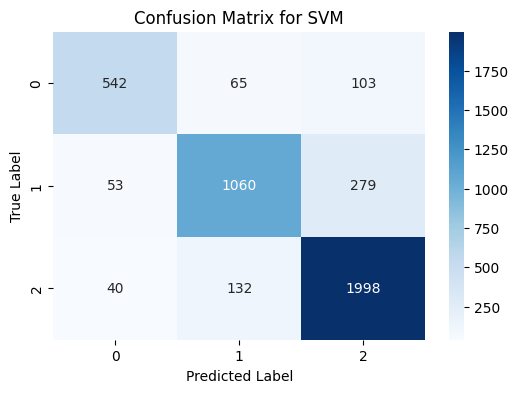

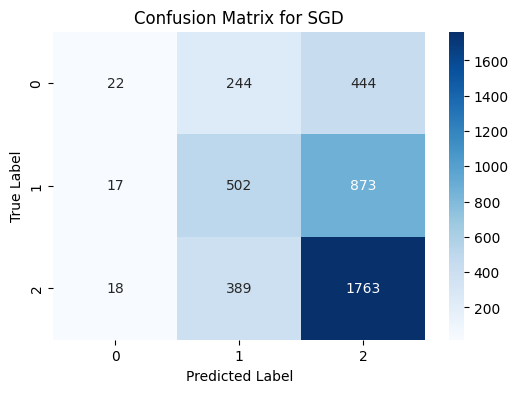

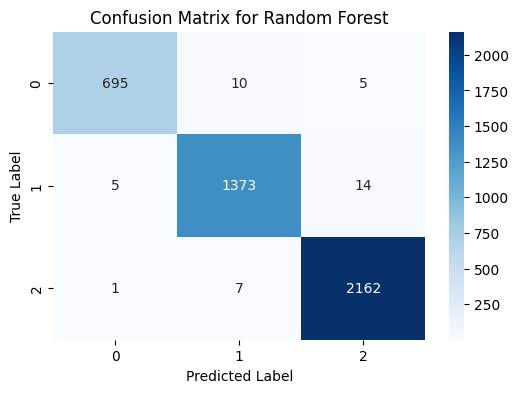

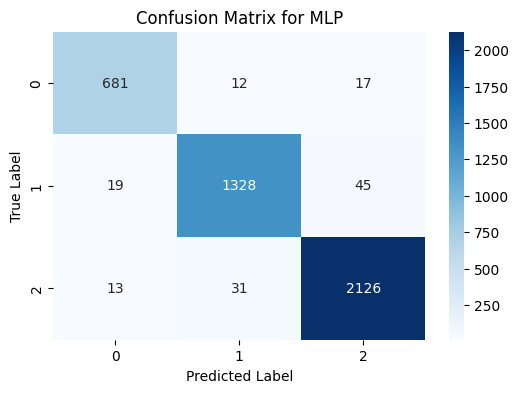

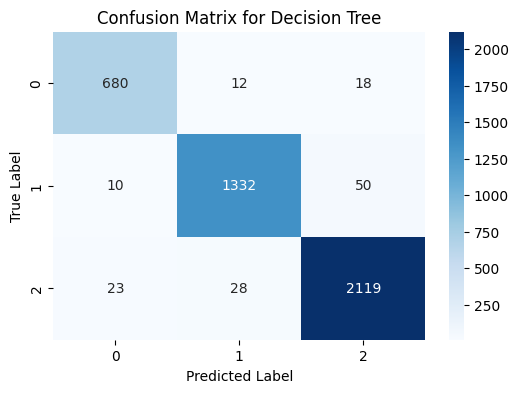

In [127]:
for name, y_pred in y_predictions.items():
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create the plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [128]:
import pickle

filename = "bestmodel.pkl"
pickle.dump(clf_rf, open(filename, 'wb'))


filename = "SGD.pkl"
pickle.dump(clf_sgd, open(filename, 'wb'))

filename = "Decision_Tree.pkl"
pickle.dump(clf_dcs, open(filename, 'wb'))

Machine Learning to AI

In [129]:
raw_test_df = pd.read_csv(base_path + '/test_df_vegemite.csv')
test_df = raw_test_df.copy()

In [130]:
X = test_df.drop('Class', axis=1)
y = test_df['Class']

In [ ]:
cols_to_drop_const = ['TFE Steam temperature SP', 'TFE Product out temperature']
X = X.drop(columns=cols_to_drop_const)

new_feature_name = 'FFTE_Pump_Average'
cols_to_combine = ['FFTE Pump 1', 'FFTE Pump 2']
X[new_feature_name] = X[cols_to_combine].mean(axis=1)




In [132]:

model1 = pickle.load(open('Decision_Tree.pkl', 'rb'))
model2 = pickle.load(open('bestmodel.pkl', 'rb'))
model3 = pickle.load(open('SGD.pkl', 'rb'))



In [133]:
# Initialize counters
correct_model1 = 0
correct_model2 = 0
correct_model3 = 0
# Iterate over each sample
for i in range(len(X)):
    x_i = X.iloc[i]            # get the i-th row as a Series
    y_i = y.iloc[i]            # true label

    x_i_reshaped = x_i.values.reshape(1, -1)

    # Predict with both models
    y_pred1 = model1.predict(x_i_reshaped)[0]
    y_pred2 = model2.predict(x_i_reshaped)[0]
    y_pred3 = model3.predict(x_i_reshaped)[0]


    # Compare predictions to true label
    if y_pred1 == y_i:
        correct_model1 += 1
    if y_pred2 == y_i:
        correct_model2 += 1
    if y_pred3 == y_i:
        correct_model3 += 1

# Compute accuracies
accuracy_model1 = correct_model1 / len(y)
accuracy_model2 = correct_model2 / len(y)
accuracy_model3 = correct_model3 / len(y)



# Print results
print("Model 1 - Correct classifications:", correct_model1)
print("Model 1 - Accuracy:", accuracy_model1)

print("Model 2 - Correct classifications:", correct_model2)
print("Model 2 - Accuracy:", accuracy_model2)

print("Model 3 - Correct classifications:", correct_model3)
print("Model 3 - Accuracy:", accuracy_model3)

Model 1 - Correct classifications: 333
Model 1 - Accuracy: 0.333
Model 2 - Correct classifications: 333
Model 2 - Accuracy: 0.333
Model 3 - Correct classifications: 334
Model 3 - Accuracy: 0.334


In [134]:
raw_shuffled_df = pd.read_csv(base_path + '/shuffled_vegemite.csv')
shuffled_df = raw_shuffled_df.copy()

X_shuffled = shuffled_df.drop(columns=["Class"])
Y_shuffled = shuffled_df["Class"]

X_shuffled = X_shuffled.filter(like='SP')
X_shuffled.columns

Index(['FFTE Feed tank level SP', 'FFTE Production solids SP',
       'FFTE Steam pressure SP', 'TFE Out flow SP', 'TFE Production solids SP',
       'TFE Vacuum pressure SP', 'TFE Steam pressure SP',
       'TFE Steam temperature SP', 'FFTE Feed flow SP',
       'FFTE Out steam temp SP'],
      dtype='object')

In [135]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, Y_shuffled, test_size=0.2, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

y_pred = clf_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy of SP feature", accuracy)


Accuracy of SP feature 0.9199475065616798


In [136]:
import pickle
filename = "dt.pkl"
pickle.dump(clf_dt, open(filename, 'wb'))

In [137]:
model4 = pickle.load(open('dt.pkl', 'rb'))

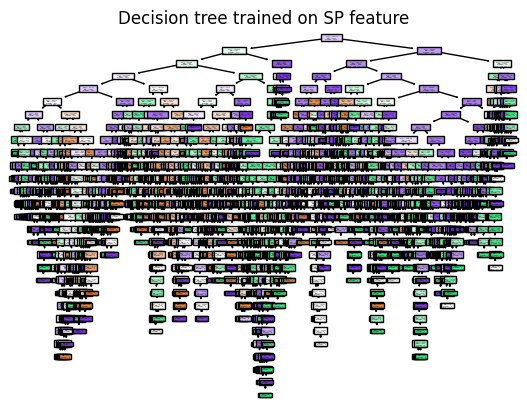

In [138]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
plot_tree(model4, filled=True)
plt.title("Decision tree trained on SP feature")
plt.show()

In [139]:
from sklearn.tree import export_text


model = DecisionTreeClassifier(random_state=42)
model.fit(X_shuffled, Y_shuffled)

tree_rules = export_text(model, feature_names=X_shuffled.columns.tolist())
print(tree_rules)

|--- TFE Out flow SP <= 2249.11
|   |--- FFTE Steam pressure SP <= 119.98
|   |   |--- TFE Out flow SP <= 2100.70
|   |   |   |--- TFE Vacuum pressure SP <= -67.99
|   |   |   |   |--- FFTE Feed flow SP <= 9395.00
|   |   |   |   |   |--- TFE Production solids SP <= 64.25
|   |   |   |   |   |   |--- FFTE Steam pressure SP <= 103.50
|   |   |   |   |   |   |   |--- FFTE Steam pressure SP <= 94.00
|   |   |   |   |   |   |   |   |--- TFE Production solids SP <= 52.75
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- TFE Production solids SP >  52.75
|   |   |   |   |   |   |   |   |   |--- TFE Production solids SP <= 60.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- TFE Production solids SP >  60.00
|   |   |   |   |   |   |   |   |   |   |--- TFE Vacuum pressure SP <= -76.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- TFE Vacuum pressure SP 